# Reading netCDF files with python

We will use the netCDF4 library (https://github.com/Unidata/netcdf4-python) for the reading and [matplotlib](http://matplotlib.org/) for the plotting.

In [1]:
import os
import matplotlib.pyplot as plt
import netCDF4

# Reading the data

Let's define the data file we want to process:

In [2]:
datadir = "./OpenSeaLab/autumn"
datafile = os.path.join(datadir, "Water_body_nitrate.4Danl.nc")

## Metadata (file header)

In [3]:
with netCDF4.Dataset(datafile) as nc:
    print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    project: SeaDataNetII: http://www.seadatanet.org/
    institution: Hellenic Centre for Marine Research, Hellenic National Oceanographic Data Centre (HCMR/HNODC)
    production: Diva group. E-mails: a.barth@ulg.ac.be; swatelet@ulg.ac.be
    data_access: GHER OPENDAB: http://gher-diva.phys.ulg.ac.be/data/
    WEB_visualisation: http://gher-diva.phys.ulg.ac.be/web-vis/clim.html
    Author_e-mail: Athanasia (Sissy) Iona <sissy@hnodc.hcmr.gr>
    date: 2015-06-16
    title: DIVA 4D analysis of Water_body_nitrate
    file_name: ../output/3Danalysis/Water_body_nitrate.4Danl.nc
    source: observational data from SeaDataNet/EMODNet Chemistry Data Network
    comment: Every year of the time dimension corresponds to a 10-year centred average for the winter (Jan-Mar) or spring (Apr-Jun) or summer (Jul-Sept) or automn (Oct-Dec) season
    product_id: 4b65b074-19a2-11e5-95c0-805

## Variables

In [4]:
with netCDF4.Dataset(datafile) as nc:
    varnames = nc.variables.keys()
for var in varnames:
    print(var)

CLfield
CORRLEN
SNR
VARBACK
Water_body_nitrate
Water_body_nitrate_L1
Water_body_nitrate_L2
Water_body_nitrate_deepest
Water_body_nitrate_deepest_L1
Water_body_nitrate_deepest_L2
Water_body_nitrate_err
Water_body_nitrate_relerr
climatology_bounds
databins
depth
lat
lon
obsdepth
obsid
obslat
obslon
obstime
outlbins
time


## Load a single variable
The `print` command provides a summary of the considered variable.

In [5]:
with netCDF4.Dataset(datafile) as nc:
    nitrate = nc.variables['Water_body_nitrate_L1']
    print(nitrate)

<class 'netCDF4._netCDF4.Variable'>
float32 Water_body_nitrate_L1(time, depth, lat, lon)
    long_name: Water_body_nitrate masked using relative error threshold 0.3
    units: umol/l
    valid_min: 0.0
    valid_max: 661.0
    _FillValue: -9999.9
    missing_value: -9999.9
unlimited dimensions: 
current shape = (45, 25, 48, 67)
filling on


To get the variable values:    

In [6]:
with netCDF4.Dataset(datafile) as nc:
    nitrate = nc.variables['Water_body_nitrate_L1'][:]
print(type(nitrate))
print(nitrate.shape)

<class 'numpy.ma.core.MaskedArray'>
(45, 25, 48, 67)


## Load the coordinates
The field has 4 dimensions:
* time, 
* depth, 
* latitude,
* longitude.

The print command provides a summary:

In [7]:
with netCDF4.Dataset(datafile) as nc:
    time = nc.variables['time']
    print(time)

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: Days since 1960-01-01
    climatology: climatology_bounds
unlimited dimensions: 
current shape = (45,)
filling on, default _FillValue of 9.969209968386869e+36 used



To get the variable values, we add `[:]` after the variable name:

In [8]:
with netCDF4.Dataset(datafile) as nc:
    lon = nc.variables['lon'][:]
    lat = nc.variables['lat'][:]
    time = nc.variables['time'][:]
    depth = nc.variables['depth'][:]

## Variable attributes
For example, the time units:

In [9]:
with netCDF4.Dataset(datafile) as nc:
    timeunits = nc.variables['time'].units
print(timeunits)
type(timeunits)

Days since 1960-01-01


str

Selection of a given year:     
the netCDF4 library provides a method to convert the time into dates:

In [10]:
dates = netCDF4.num2date(time, timeunits)
print(dates)

[datetime.datetime(1965, 11, 16, 0, 0)
 datetime.datetime(1966, 11, 16, 0, 0)
 datetime.datetime(1967, 11, 16, 0, 0)
 datetime.datetime(1968, 11, 16, 0, 0)
 datetime.datetime(1969, 11, 16, 0, 0)
 datetime.datetime(1970, 11, 16, 0, 0)
 datetime.datetime(1971, 11, 16, 0, 0)
 datetime.datetime(1972, 11, 16, 0, 0)
 datetime.datetime(1973, 11, 16, 0, 0)
 datetime.datetime(1974, 11, 16, 0, 0)
 datetime.datetime(1975, 11, 16, 0, 0)
 datetime.datetime(1976, 11, 16, 0, 0)
 datetime.datetime(1977, 11, 16, 0, 0)
 datetime.datetime(1978, 11, 16, 0, 0)
 datetime.datetime(1979, 11, 16, 0, 0)
 datetime.datetime(1980, 11, 16, 0, 0)
 datetime.datetime(1981, 11, 16, 0, 0)
 datetime.datetime(1982, 11, 16, 0, 0)
 datetime.datetime(1983, 11, 16, 0, 0)
 datetime.datetime(1984, 11, 16, 0, 0)
 datetime.datetime(1985, 11, 16, 0, 0)
 datetime.datetime(1986, 11, 16, 0, 0)
 datetime.datetime(1987, 11, 16, 0, 0)
 datetime.datetime(1988, 11, 16, 0, 0)
 datetime.datetime(1989, 11, 16, 0, 0)
 datetime.datetime(1990, 

# Creating  plots

## Simple plots
We will represent 2D fields (longitude and latitude).  

In [11]:
nitrate2D = nitrate[-1, -1, :, :]
print(nitrate2D.shape)

(48, 67)


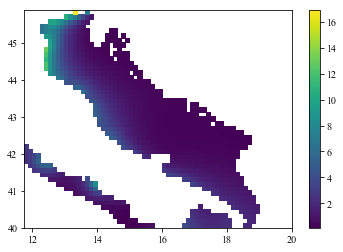

In [12]:
fig = plt.figure()
plt.pcolormesh(lon, lat, nitrate2D)
plt.colorbar()
plt.show()
plt.close()

## Interacting with [leaflet](http://leafletjs.com/)

In [14]:
import folium

In [16]:
m = folium.Map(location=[lat.mean(), lon.mean()])

In [17]:
m